# Quantum Full Adder

This jupyter notebook is for decimal number addition based on quantum computer (qubits). First we convert decimal numbers to binary numbers and according to that we build a quantum circuit to execute addition operation. Here we check the length of the binary number and build the circuit accordingly, for shorter binary numbers, refer to file "Specified additions". 

## Restriction

You can input max "511" if you have 16GB(15.75GB exactly) RAM. 

Between "512-1023" we need 16GB (16384M) RAM exactly.

Between "1024-2047" we need 128GB of RAM.

After "2048" we need 1TB RAM.

Binary representation of 511 is 111111111
Binary representation of 9 is 000001001


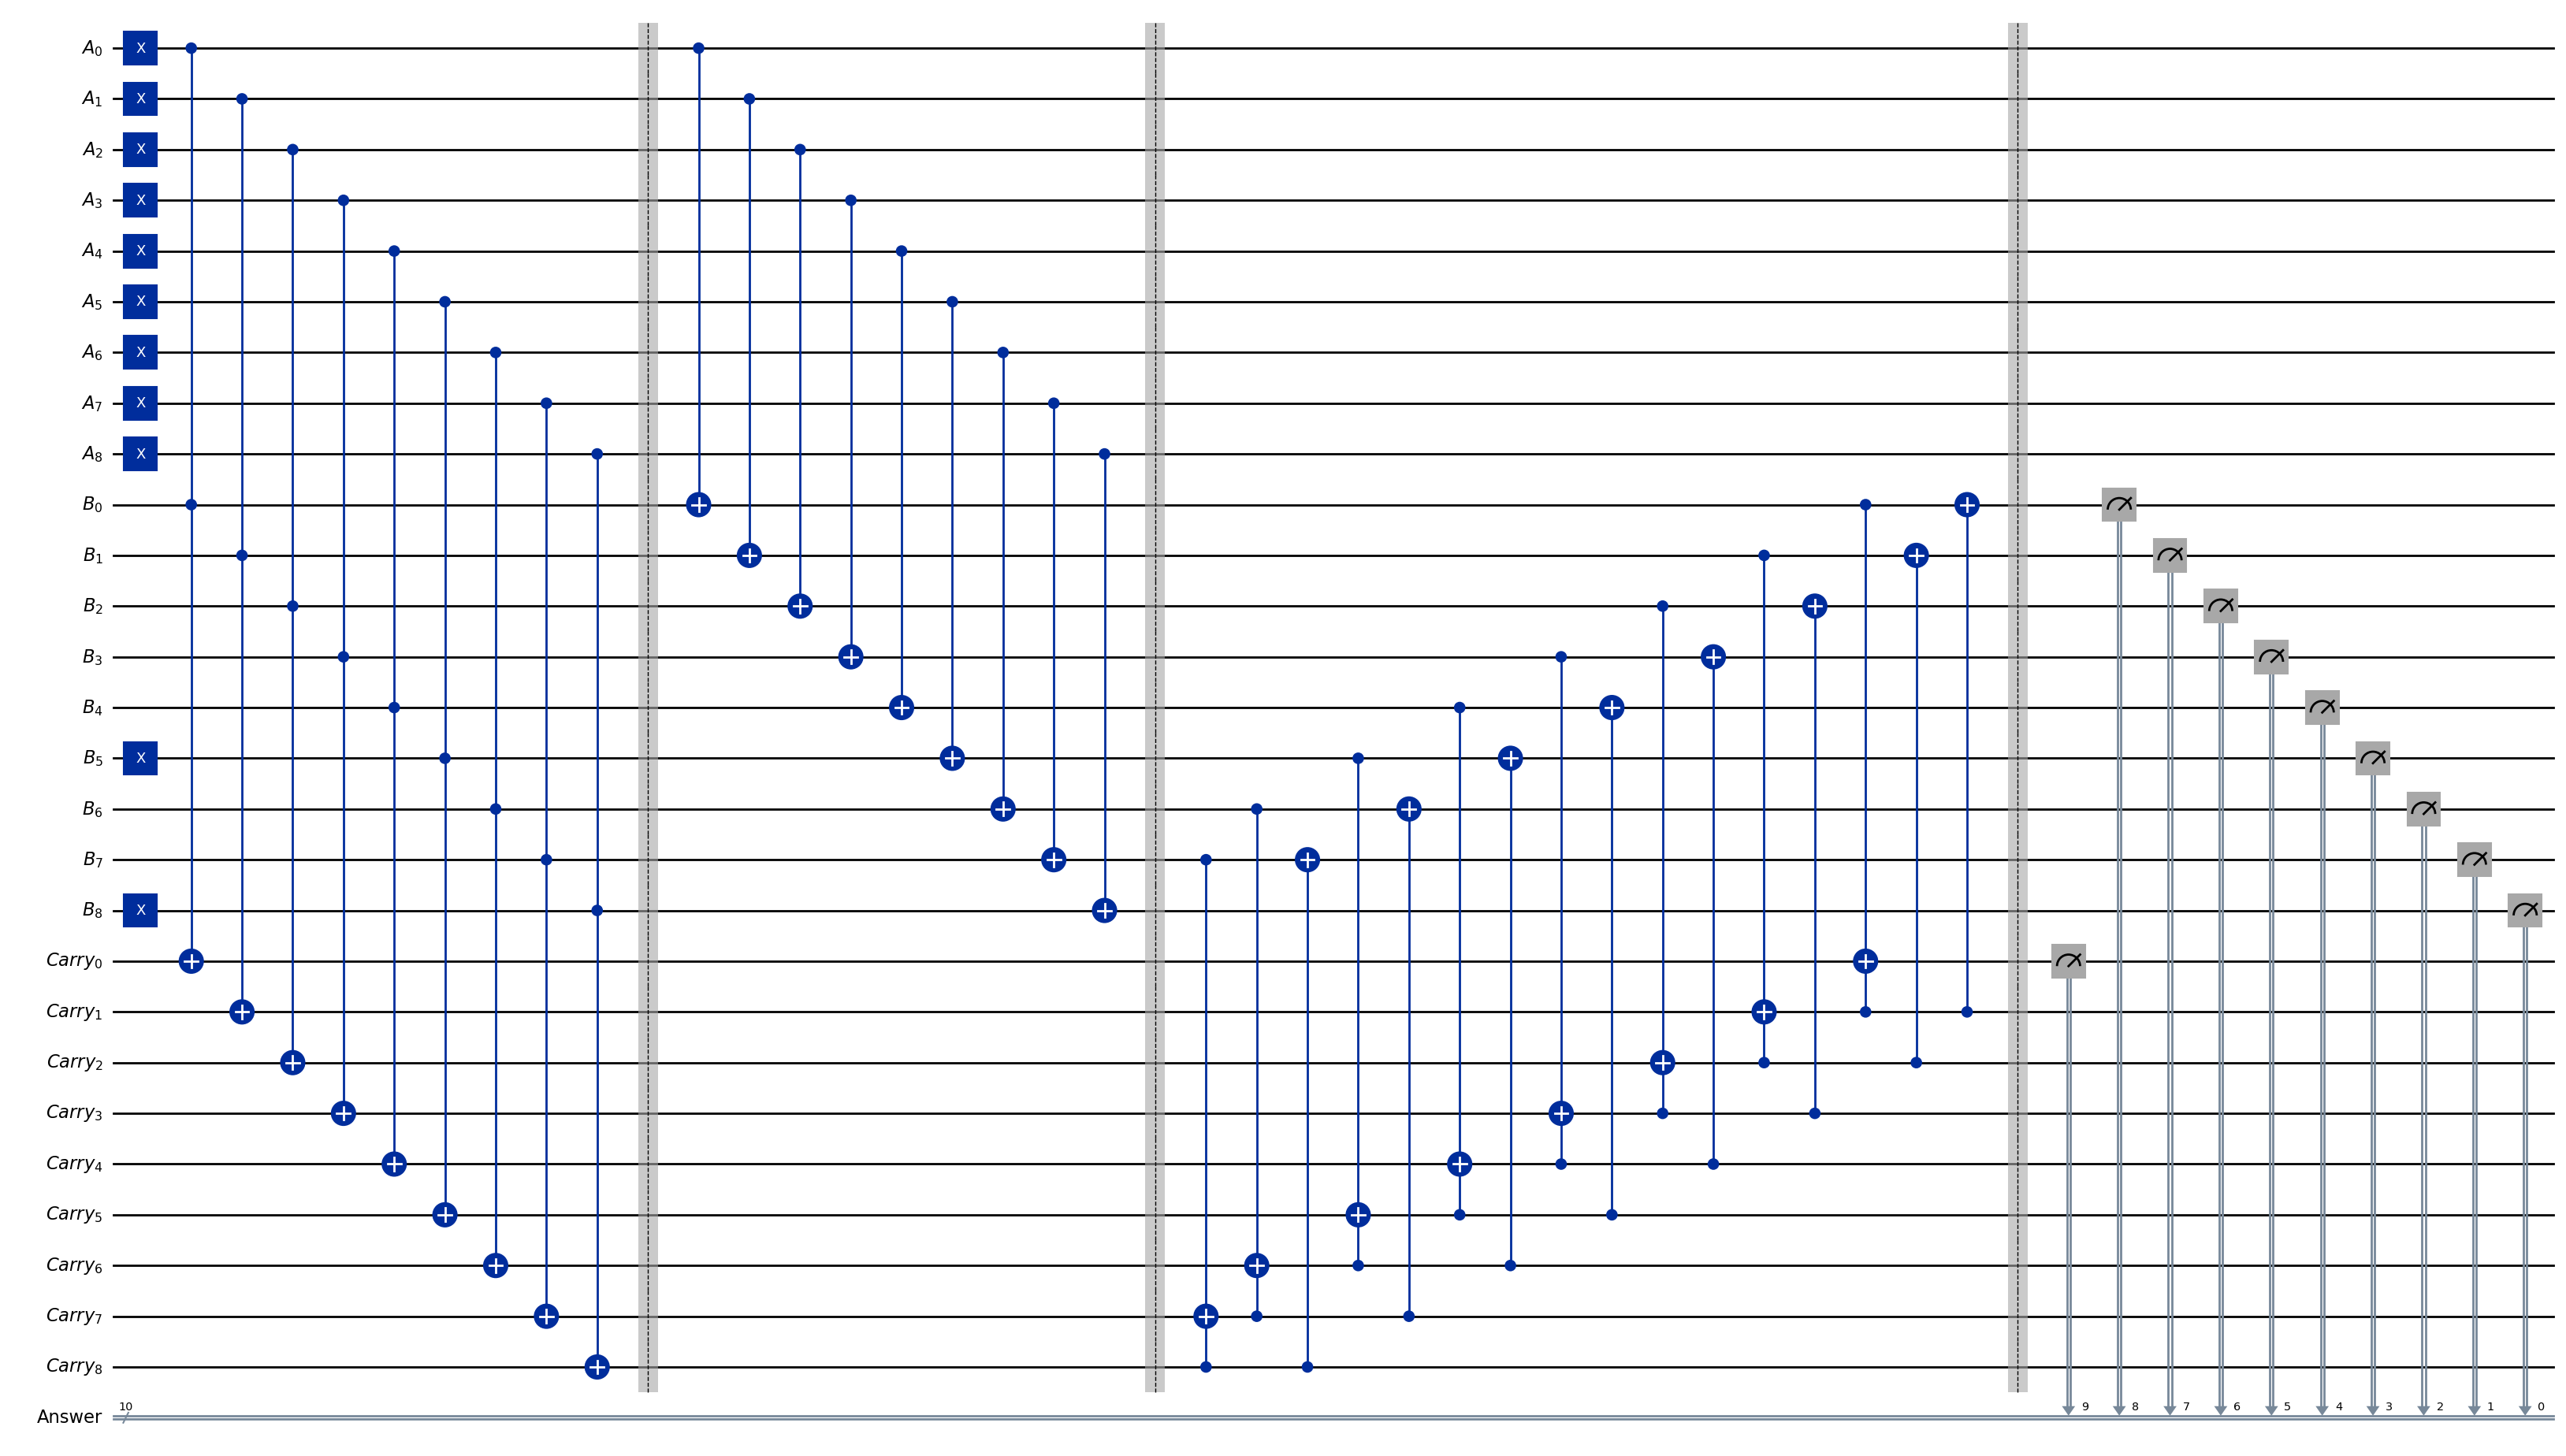

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister



# Function to convert a decimal number to binary
def decimal_to_binary(decimal_value):
    return bin(decimal_value)[2:]

# Decimal values wanted to add
decimal1 = int(input("Enter the first decimal value: "))
decimal2 = int(input("Enter the second decimal value: "))

# Converting decimal values to binary
x = decimal_to_binary(decimal1)
y = decimal_to_binary(decimal2)

# Padding the shorter binary number with leading zeros
max_length = max(len(x), len(y))
x = x.zfill(max_length)
y = y.zfill(max_length)

print(f"Binary representation of {decimal1} is {x}")
print(f"Binary representation of {decimal2} is {y}")



# Qubit number(n) selection

if len(x)>len(y):
    n = len(x)
else:
    n = len(y)


#A is first number's register and B is second number's register.

A = QuantumRegister(n, 'A')
B = QuantumRegister(n , 'B')

C = QuantumRegister(n , 'Carry')

Ans = ClassicalRegister(n+1 ,'Answer')

qc = QuantumCircuit(A,B,C,Ans)






#installation of input numbers to the quantum circuit

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])


#checks if both A[n] and B[n] are '1' and copy result on C[n] (carry) register

for i in range(n):
    qc.ccx(A[i],B[i],C[i])


qc.barrier()



for i in range(n):
    qc.cx(A[i],B[i])


qc.barrier()

for i in range(n-1):
    qc.ccx(C[n-1-i],B[n-2-i],C[n-2-i])


for i in range(n-1):
    qc.cx(C[n-1-i],B[n-2-i])

qc.barrier()


qc.measure(C[0],Ans[n])

for i in range(n):
    qc.measure(B[i],Ans[n-1-i])




d = input("Show circuit (y/n)")

if d == "y":
    display(qc.draw("mpl", fold = -1))
else:
    pass





{'1000001000': 1024}


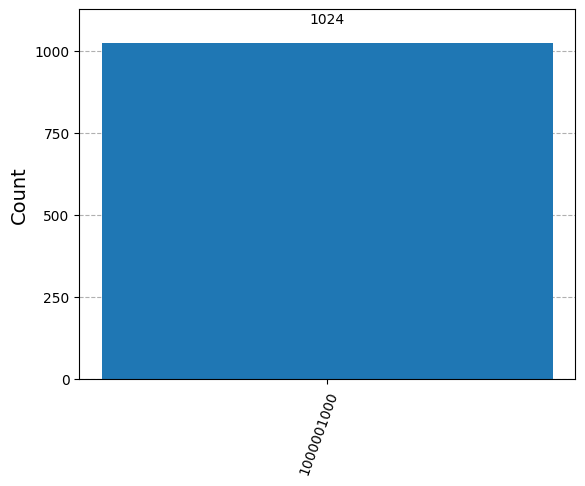

Decimal value of binary 1000001000 is: 520


In [2]:
from qiskit_aer import AerSimulator


result = AerSimulator().run(qc).result()
stats = result.get_counts()

print(stats)

from qiskit.visualization import plot_histogram


p = input("Show histogram (y/n): ")

if p == "y":
    display(plot_histogram(stats))
else:
    pass



# Function to convert a binary number to decimal
def binary_to_decimal(binary_value):
    return int(binary_value, 2)

# Extract the binary number from stats
binary_number = list(stats.keys())[0]

# Convert the binary number to a decimal value
decimal_value = binary_to_decimal(binary_number)

# Print the decimal value
print(f"Decimal value of binary {binary_number} is: {decimal_value}")